In [5]:
import pandas as pd
import numpy as np
import json

# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns


## **1. Entendimiento inicial**

Se carga el dataset

In [48]:
EXCEL_PATH = "Base infecciones POPTH.xlsx"

In [47]:
#df = pd.read_excel(EXCEL_PATH, sheet_name="Base de datos principal") #HOJA ORIGINAL
df = pd.read_excel(EXCEL_PATH, sheet_name="BD") #HOJA LIMPIA

Se revisan las dimensiones del dataset.

In [8]:
print("Número de columnas(variables):", df.shape[1])
print("Número de filas (pacientes):", df.shape[0])

Número de columnas(variables): 60
Número de filas (pacientes): 557


In [9]:
# formatear el nombre de las columnas, algunas tienen espacios al inicio o final
df.columns = df.columns.str.strip()

Se listan los atributos (columnas) del dataset y sus tipos

In [10]:
df.dtypes

#Paciente_Tx                                    int64
Año_Tx                                          int64
Fecha_Tx                                        int64
Código anonimizado                             object
Edad                                            int64
Sexo                                            int64
Etiología_#1                                    int64
Etiología_#2                                    int64
Child_Pugh_Score                               object
Meld_Score                                     object
Diabetes_Mellitus                              object
Tabaquismo                                     object
Alcoholismo                                    object
Hipertensión_Arterial                         float64
Peso_previo_Cx                                float64
Talla                                           int64
IMC                                           float64
Antecedente_UCI_6_meses_PreOP                  object
UCI_al_Momento_Tx           

In [11]:
# contar tipos de datos
df.dtypes.value_counts()

object     23
float64    22
int64      15
Name: count, dtype: int64

Se muestran las primeras filas para entender la estructura de los datos

In [12]:
df.head()

,#Paciente_Tx,Año_Tx,Fecha_Tx,Código anonimizado,Edad,Sexo,Etiología_#1,Etiología_#2,Child_Pugh_Score,Meld_Score,...,Inmunosupresión_con_Anticuerpos,Inmunosupresor_1_1mesPostTx,Inmunosupresor_2_PostTx_1mesPx,Inmunosupresor_1_6mesesPostx,Inmunosupresor_2_6mesesPostTx,Vivo_Hoy,Fecha_Control/Muerte,SOBREVIDA_DIAS,SOBREVIDA_MESES,SOBREVIDA_AÑOS
0,1,2009,39816,P001,62,1,1,0,3,18,...,1.0,1.0,1.0,2.0,1.0,0,40091,275,9.17,0.76
1,2,2009,39823,P002,62,1,3,0,2,17,...,9999.0,9999.0,9999.0,9999.0,9999.0,0,39824,1,0.03,0.00
2,3,2009,39847,P003,56,2,8,0,1,15,...,9999.0,1.0,1.0,1.0,0.0,1,45291,5444,181.47,15.12
3,4,2009,39849,P004,58,1,3,0,1,9,...,1.0,1.0,1.0,1.0,0.0,1,45291,5442,181.40,15.12
4,5,2009,39855,P005,62,2,4,0,2,22,...,9999.0,1.0,1.0,2.0,1.0,1,45291,4724,157.47,13.12


Codebook

In [13]:
df_codebook_original = pd.read_excel(EXCEL_PATH, sheet_name="Codificación")  

In [14]:
df_codebook_original.columns = df_codebook_original.columns.str.strip()

In [15]:
print("Número de columnas(variables):", df_codebook_original.shape[1])

Número de columnas(variables): 69


In [16]:
df_codebook_original

,#Paciente_Tx,Año_Tx,Fecha_Tx,ID,Nombre,Edad,Sexo,Etiología_#1,Etiología_#2,Child_Pugh_Score,...,SOBREVIDA_DIAS,SOBREVIDA_MESES,SOBREVIDA_AÑOS,#,ID.1,Nombre,Infección POP,Tipo de infección,Aislamiento,Fecha
0,Interpretación,Año del trasplante,Tiempo transcurrido \ndesde el trasplante \nhe...,ID del paciente,Nombre del paciente,Tiempo transcurrido \na partir del \nnacimient...,"Condición orgánica, \nmasculina o \nfemenina",Enfermedad que \nlo llevó a la \nenfermedad he...,Enfermedad que \nlo llevó a la \nenfermedad he...,Child_Pugh_Score,...,Sobrevida en días post trasplante,Sobrevida en meses post trasplante,Sobrevida en años post trasplante,0.0,NaN,NaN,No,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NINGUNA,NINGUNA,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,Sí,ISO,K. PNEUMONIAE,NaN
2,1,NaN,NaN,NaN,NaN,NaN,M,HCV,HCV,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,IVU,CMV,NaN
3,2,NaN,NaN,NaN,NaN,NaN,F,HBV,HBV,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NEUMONÍA,ENTEROCOCO FAECIUM,NaN
4,3,NaN,NaN,NaN,NaN,NaN,NaN,NASH,NASH,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,CVC,STREPTOCOCCUS VIRIDANS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hay más variables en el codebook entregado que en el dataset. Revisando se encontró que hay algunas que no existen en el dataset o tienen nombres diferentes. Por lo que se procederá a crear un diccionario de datos organizado.

In [17]:
# obtener la primera fila del DataFrame, contiene las descripciones
df_original = pd.read_excel(EXCEL_PATH, sheet_name="Base de datos principal")
df_original.columns = df_original.columns.str.strip()
first_row = df_original.iloc[0].reset_index()

In [18]:
df_codebook_new = first_row.copy()
df_codebook_new.columns = ["Column", "Description"]
df_codebook_new["Column"] = df_codebook_new["Column"].str.strip()
df_codebook_new["Description"] = df_codebook_new["Description"].str.strip().str.replace("\n", "")
df_codebook_new["Dtype"] = df_codebook_new["Column"].map(df.dtypes.astype(str))
df_codebook_new

,Column,Description,Dtype
0,#Paciente_Tx,Número de paciente,int64
1,Año_Tx,Año del trasplante,int64
2,Fecha_Tx,Tiempo transcurrido desde el trasplante hepático,int64
3,Código anonimizado,Código anonimizado para tratamiento de datos d...,object
4,Edad,Tiempo transcurrido a partir del nacimiento de...,int64
5,Sexo,"Condición orgánica, masculina o femenina",int64
6,Etiología_#1,Enfermedad que lo llevó a la enfermedad hepática,int64
7,Etiología_#2,Enfermedad que lo llevó a la enfermedad hepática,int64
8,Child_Pugh_Score,Child_Pugh_Score,object
9,Meld_Score,Meld_Score,object


In [19]:
def creat_dic(col_name, df_codebook_original):
    dic_column = {}
    # Solo intentar si la columna existe en el codebook original
    if col_name in df_codebook_original.columns:
        df_column = df_codebook_original[col_name].loc[1:]
        df_column.index = df_column.index-1
        dic_column = df_column.to_dict()
        # Elimina del diccionario todas las llaves cuyos valores son NaN.
        dic_column = {key: value for key, value in dic_column.items() if not pd.isna(value)}
       
    else:
        print(f"Columna '{col_name}' no encontrada en el codebook original.")
    return dic_column


# 2. Aplicar la lógica de mapeo y limpieza en un solo paso
df_codebook_new["Choices"] = df_codebook_new["Column"].map(lambda col: creat_dic(col, df_codebook_original))

# 3. Mostrar el resultado
display(df_codebook_new)

Columna 'Código anonimizado' no encontrada en el codebook original.
Columna 'Tiempo_Isquemia_caliente' no encontrada en el codebook original.


,Column,Description,Dtype,Choices
0,#Paciente_Tx,Número de paciente,int64,"{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: ..."
1,Año_Tx,Año del trasplante,int64,{}
2,Fecha_Tx,Tiempo transcurrido desde el trasplante hepático,int64,{}
3,Código anonimizado,Código anonimizado para tratamiento de datos d...,object,{}
4,Edad,Tiempo transcurrido a partir del nacimiento de...,int64,{}
5,Sexo,"Condición orgánica, masculina o femenina",int64,"{1: 'M', 2: 'F'}"
6,Etiología_#1,Enfermedad que lo llevó a la enfermedad hepática,int64,"{0: 'NINGUNA', 1: 'HCV', 2: 'HBV', 3: 'NASH', ..."
7,Etiología_#2,Enfermedad que lo llevó a la enfermedad hepática,int64,"{0: 'NINGUNA', 1: 'HCV', 2: 'HBV', 3: 'NASH', ..."
8,Child_Pugh_Score,Child_Pugh_Score,object,{}
9,Meld_Score,Meld_Score,object,{}


In [20]:
df_codebook_new.at[0, "Choices"] = {}
df_codebook_new["Var Type"] = np.where(df_codebook_new["Choices"] == {}, "Numerical", "Categorical")

In [21]:
df_codebook_new

,Column,Description,Dtype,Choices,Var Type
0,#Paciente_Tx,Número de paciente,int64,{},Numerical
1,Año_Tx,Año del trasplante,int64,{},Numerical
2,Fecha_Tx,Tiempo transcurrido desde el trasplante hepático,int64,{},Numerical
3,Código anonimizado,Código anonimizado para tratamiento de datos d...,object,{},Numerical
4,Edad,Tiempo transcurrido a partir del nacimiento de...,int64,{},Numerical
5,Sexo,"Condición orgánica, masculina o femenina",int64,"{1: 'M', 2: 'F'}",Categorical
6,Etiología_#1,Enfermedad que lo llevó a la enfermedad hepática,int64,"{0: 'NINGUNA', 1: 'HCV', 2: 'HBV', 3: 'NASH', ...",Categorical
7,Etiología_#2,Enfermedad que lo llevó a la enfermedad hepática,int64,"{0: 'NINGUNA', 1: 'HCV', 2: 'HBV', 3: 'NASH', ...",Categorical
8,Child_Pugh_Score,Child_Pugh_Score,object,{},Numerical
9,Meld_Score,Meld_Score,object,{},Numerical


In [22]:
# guardar la fila como un archivo JSON
with open("new_codebook.json", "w", encoding="utf-8") as f:
    json.dump(df_codebook_new.set_index("Column").to_dict(orient="index"), f, ensure_ascii=False, indent=3)

## **2. Análisis de calidad y preparación de datos**

In [23]:
# cargar nuevo codebook
with open("new_codebook.json", "r", encoding="utf-8") as f:
    df_codebook = json.load(f)

Dimensiones de calidad:
1. Completitud: Valores nulos​
2. Unicidad: Detectar valores duplicados
3. Consistencia: Validación de los tipos de datos

In [24]:
#Revisamos valores nulos sobre todo el dataset
display(df.isna().sum().sort_values(ascending=False))
numero_filas_con_nulos = df.isna().any(axis=1).sum()
print(f"Número de filas con al menos un valor nulo: {numero_filas_con_nulos}, lo que representa el {numero_filas_con_nulos / df.shape[0] * 100:.2f}% del total de filas.")


Localización de la infección                  479
Germen/Microorganismo aislado                 479
Fecha_Egreso_UCI                              429
Fecha_Egreso_Hospitalario                     369
Antibiotico_previo_al_Tx                      300
Tiempo_Isquemia_Fria                          178
Tiempo_Isquemia_caliente                      136
Hipertensión_Arterial                         127
Inmunosupresor_2_6mesesPostTx                  11
Inmunosupresor_1_6mesesPostx                   11
Inmunosupresor_1_1mesPostTx                     8
Inmunosupresor_2_PostTx_1mesPx                  8
Inmunosupresión_con_Anticuerpos                 7
Complicaciones_Técnicas                         5
Requerimiento_de_diálisis                       4
Días_Nutrición_Enteral                          4
Trasfusión_GRE_hasta_1m_POP                     4
Reintervención_Quirúrgica_hasta_1m_POP          4
Nutrición_Enteral                               3
Tiempo_De_Dosis_Hasta_Tx#1                      3


Número de filas con al menos un valor nulo: 555, lo que representa el 99.64% del total de filas.


In [25]:
# Revisamos duplicados sobre todo el dataset
num_duplicados = df.duplicated().sum()
print(f"Número de duplicados: {num_duplicados} (%{num_duplicados/len(df)*100:.2f})")

Número de duplicados: 0 (%0.00)


In [26]:
# conservar datos completos
df_clean = df.dropna()
print("Número de filas sin nulos:", df_clean.shape[0])

Número de filas sin nulos: 2


# 3. Análisis univariado

*Grupo 2 — Intraoperatorio, profilaxis antibiótica y metadatos de registro*

Año_Tx; Fecha_Tx; Tiempo_Cx; Tiempo_Isquemia_Fria; Tiempo_Isquemia_caliente; Tipo_Reconstrucción_Biliar; Antibiótico_Profiláctico_VS_Terapéutico; Antibiotico_previo_al_Tx; Días_Tratamiento_Antibiótico_Previo_A_Tx#1; Tiempo_De_Dosis_Hasta_Tx#1; Antibiótico_1__Tx#1; Antibiótico_2_Tx#1; Antibiótico_3_Tx#1; Antifúngico_Tx#1; Infección_Al_Momento_Tx.

In [27]:
columnas = ['Año_Tx', 'Fecha_Tx', 'Tiempo_Cx', 'Tiempo_Isquemia_Fria', 'Tiempo_Isquemia_caliente', 'Tipo_Reconstrucción_Biliar', 'Antibiótico_Profiláctico_VS_Terapéutico', 'Antibiotico_previo_al_Tx', 'Días_Tratamiento_Antibiótico_Previo_A_Tx#1', 'Tiempo_De_Dosis_Hasta_Tx#1', 'Antibiótico_1__Tx#1', 'Antibiótico_2_Tx#1', 'Antibiótico_3_Tx#1', 'Antifúngico_Tx#1', 'Infección_Al_Momento_Tx']

In [80]:
# cargar json
df_codebook = pd.read_json("new_codebook.json", orient="index")

In [81]:
df_codebook = df_codebook.loc[columnas]
df_codebook

,Description,Dtype,Choices,Var Type
Año_Tx,Año del trasplante,int64,{},Numerical
Fecha_Tx,Tiempo transcurrido desde el trasplante hepático,int64,{},Numerical
Tiempo_Cx,Tiempo en horas,float64,{},Numerical
Tiempo_Isquemia_Fria,Tiempo de isquemia fría reportado en la histor...,object,{},Numerical
Tiempo_Isquemia_caliente,Tiempo de isquemia caliente reportado en la hi...,object,{},Numerical
Tipo_Reconstrucción_Biliar,Define cómo se reconstruyó la vía biliar,object,"{'1': 'Ducto - Ducto', '2': 'Hepatico o Coledo...",Categorical
Antibiótico_Profiláctico_VS_Terapéutico,Define si el AB que recibió al momento de la C...,int64,"{'0': 'Profiláctico', '1': 'Terapéutico '}",Categorical
Antibiotico_previo_al_Tx,Antibiótico terapia previa a 3 meses,object,"{'0': 'NO', '1': 'SI'}",Categorical
Días_Tratamiento_Antibiótico_Previo_A_Tx#1,"Si fue terapéutico, definir desde cuánto tiemp...",int64,{},Numerical
Tiempo_De_Dosis_Hasta_Tx#1,TIEMPO ENTRE LA PROFILAXIS ANTIBIÓTICA Y LA IN...,object,{},Numerical


## Numericas

In [59]:
def graficar_var_numerica(df, columna_a_graficar, nombre_columa):
    # Visualización
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

    columna_stats = df[columna_a_graficar].describe()
    # Histograma con KDE
    sns.histplot(x = df[columna_a_graficar], bins=50, kde=True, ax=ax1, color='lightblue')
    ax1.set_title(f'Distribución de {columna_a_graficar}')
    ax1.set_xlabel(nombre_columa)
    ax1.set_ylabel('Frecuencia')
    ax1.axvline(int(columna_stats['mean']), color='red', linestyle='--', label=f'Media: {int(columna_stats["mean"])} año')
    ax1.axvline(int(columna_stats['50%']), color='blue', linestyle='--', label=f'Mediana: {int(columna_stats["50%"])} año')
    ax1.legend()

    # Boxplot horizontal
    sns.boxplot(x=df[columna_a_graficar], ax=ax2, color='lightgreen', showmeans=True)
    ax2.set_title(f'Box Plot de {columna_a_graficar}')
    ax2.set_xlabel(nombre_columa)
    ax2.set_ylabel('')

    plt.tight_layout()
    plt.show()

In [ ]:

filter_num = df_codebook['Var Type'] == 'Numerical'
df_codebook_num = df_codebook[filter_num]
num_vars = df_codebook_num.index.to_list()
df_codebook_num

,Description,Dtype,Choices,Var Type
Año_Tx,Año del trasplante,int64,{},Numerical
Fecha_Tx,Tiempo transcurrido desde el trasplante hepático,int64,{},Numerical
Tiempo_Cx,Tiempo en horas,float64,{},Numerical
Tiempo_Isquemia_Fria,Tiempo de isquemia fría reportado en la histor...,object,{},Numerical
Tiempo_Isquemia_caliente,Tiempo de isquemia caliente reportado en la hi...,object,{},Numerical
Días_Tratamiento_Antibiótico_Previo_A_Tx#1,"Si fue terapéutico, definir desde cuánto tiemp...",int64,{},Numerical
Tiempo_De_Dosis_Hasta_Tx#1,TIEMPO ENTRE LA PROFILAXIS ANTIBIÓTICA Y LA IN...,object,{},Numerical


#### ``Año_Tx``
Año del trasplante

In [54]:
df["Año_Tx"].isna().sum()

np.int64(0)

In [55]:
df["Año_Tx"].value_counts(dropna=False)

Año_Tx
2017    58
2009    44
2016    43
2010    43
2015    40
2018    38
2012    37
2023    37
2014    35
2011    33
2019    33
2022    29
2013    27
2024    25
2021    22
2020    13
Name: count, dtype: int64

In [56]:
df["Año_Tx"].describe()

count     557.000000
mean     2015.924596
std         4.500766
min      2009.000000
25%      2012.000000
50%      2016.000000
75%      2019.000000
max      2024.000000
Name: Año_Tx, dtype: float64

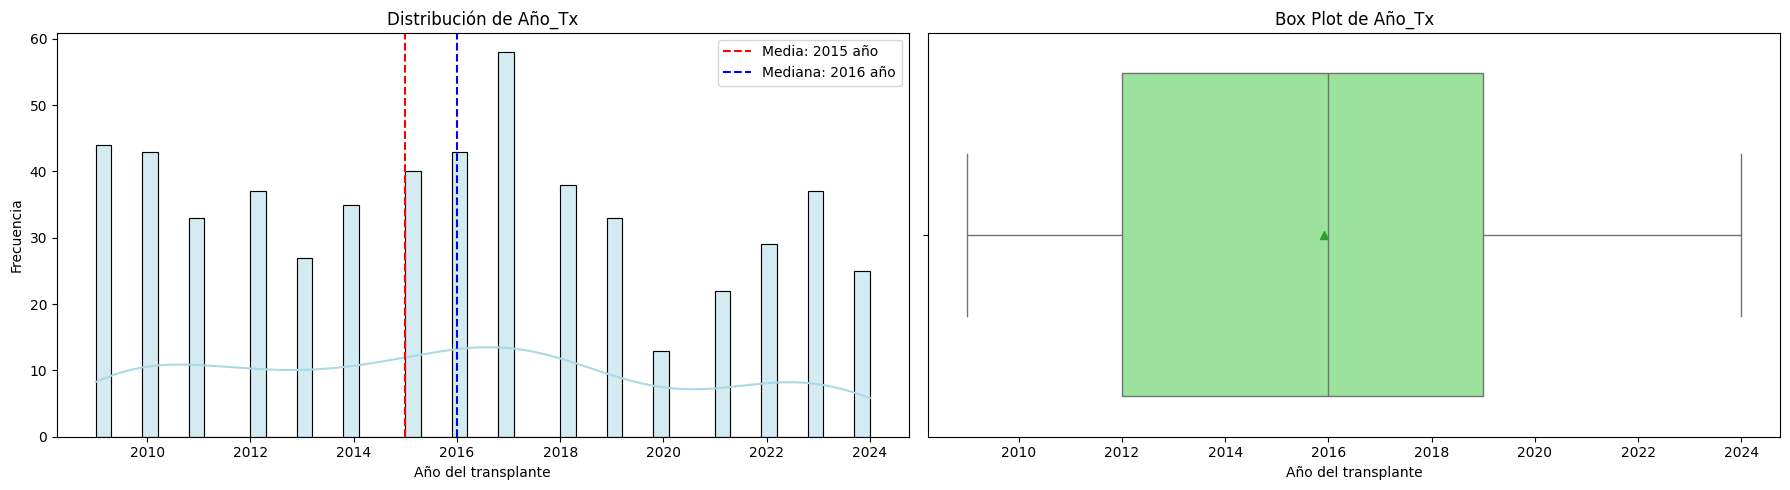

In [60]:
graficar_var_numerica(df, "Año_Tx", "Año del transplante")

#### ``Fecha_Tx``	
Tiempo transcurrido desde el trasplante hepático

In [63]:
df["Fecha_Tx"].isna().sum()

np.int64(0)

In [62]:
df["Fecha_Tx"].value_counts(dropna=False)

Fecha_Tx
40539    2
40438    2
41644    2
41718    2
42805    2
        ..
45546    1
39880    1
45573    1
45581    1
45594    1
Name: count, Length: 544, dtype: int64

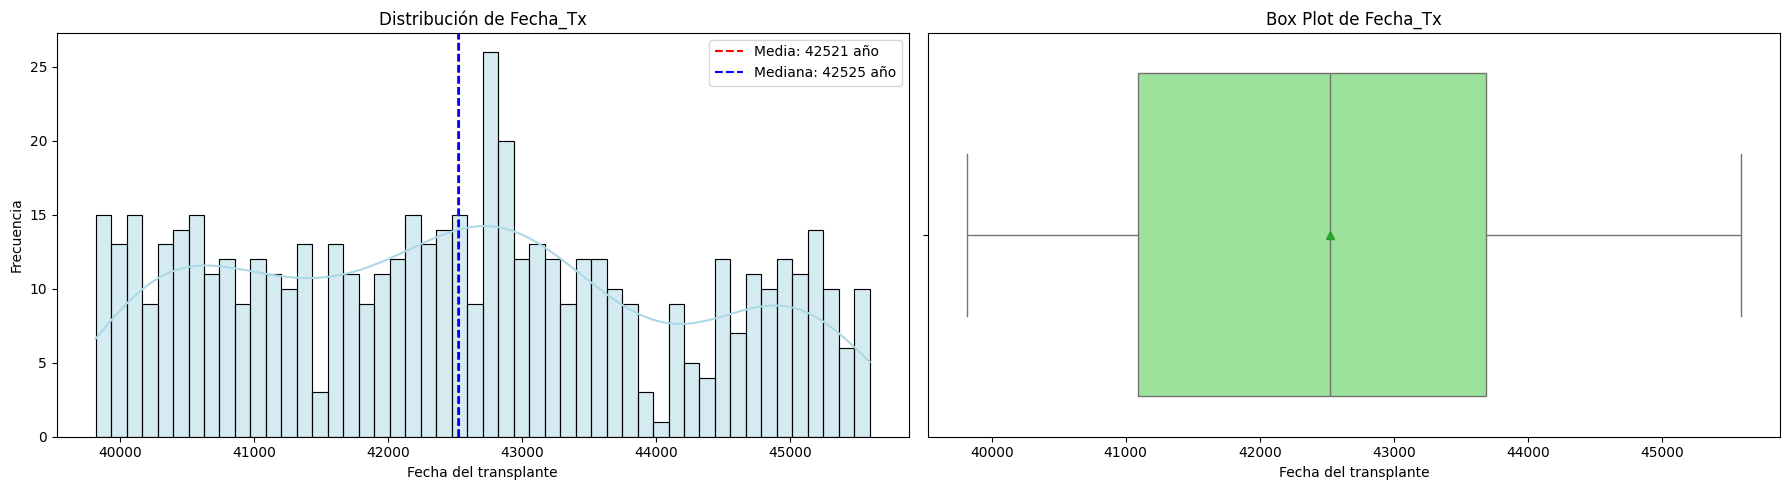

In [104]:
graficar_var_numerica(df, "Fecha_Tx", "Fecha del transplante")

#### ``Tiempo_Cx``	
Tiempo en horas de la cirugia (>2)

In [65]:
df["Tiempo_Cx"].isna().sum()

np.int64(0)

In [103]:
df["Tiempo_Cx"].describe()

count    557.000000
mean       7.595458
std        4.013322
min        0.000000
25%        6.830000
50%        8.230000
75%        9.500000
max       22.820000
Name: Tiempo_Cx, dtype: float64

In [67]:
df["Tiempo_Cx"].value_counts(dropna=False)

Tiempo_Cx
0.00    83
9.00    22
8.00    21
7.00    13
8.67    13
        ..
7.28     1
3.83     1
1.92     1
2.75     1
2.25     1
Name: count, Length: 183, dtype: int64

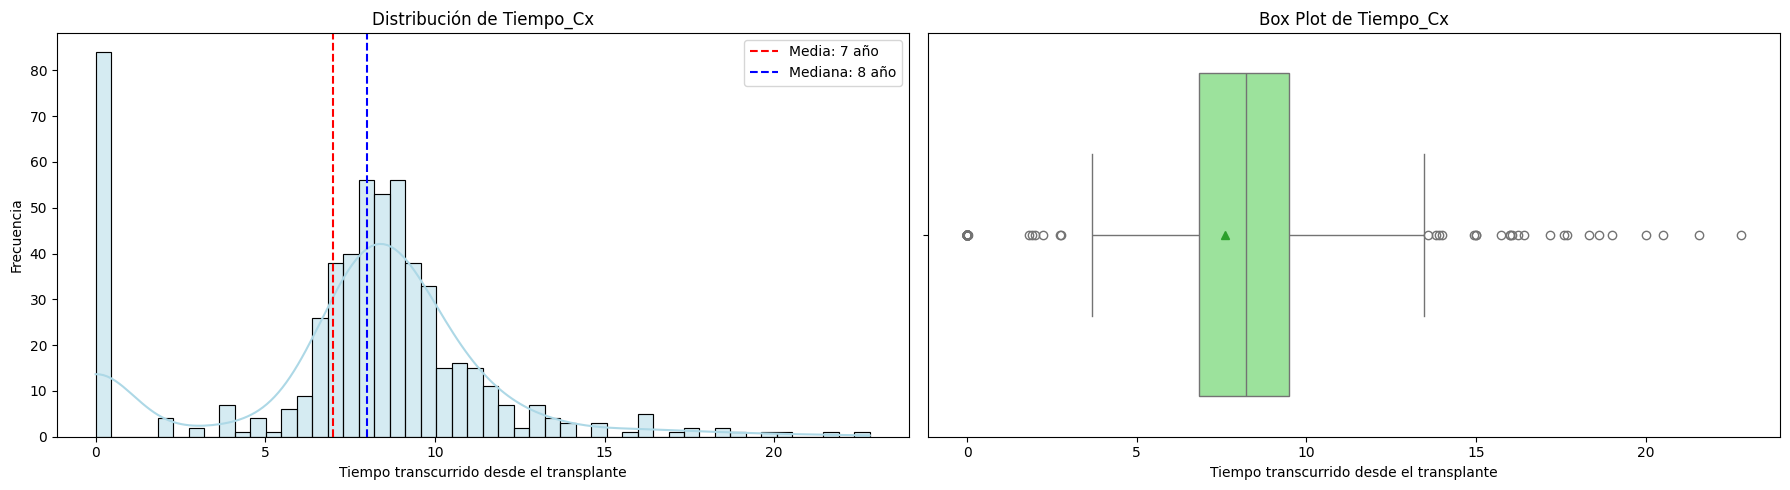

In [68]:
graficar_var_numerica(df, "Tiempo_Cx", "Tiempo transcurrido desde el transplante")

#### ``Tiempo_Isquemia_Fria``	
Tiempo de isquemia fría reportado en la historia clínica en horas

In [69]:
df["Tiempo_Isquemia_Fria"].isna().sum()

np.int64(178)

In [70]:
df["Tiempo_Isquemia_Fria"].value_counts(dropna=False)

Tiempo_Isquemia_Fria
NaN            178
 8 HORAS        43
 7 HORAS        36
 6 HORAS        30
 4 HORAS        28
              ... 
 8 HORAS.        1
  HORAS          1
 13HORAS         1
 7\n\nHORAS      1
 04 HORAS        1
Name: count, Length: 151, dtype: int64

#### `Tiempo_Isquemia_caliente`	
Tiempo de isquemia caliente reportado en la historia clínica ne minutos


In [72]:
df["Tiempo_Isquemia_caliente"].isna().sum()

np.int64(136)

In [73]:
df["Tiempo_Isquemia_caliente"].value_counts(dropna=False)

Tiempo_Isquemia_caliente
NaN        136
 30 M       28
 35 M       25
 34 M       22
 33 M       18
          ... 
 56 M        1
. HÍG        1
  42M        1
 2\n\n5      1
 : 61        1
Name: count, Length: 105, dtype: int64

#### ``Días_Tratamiento_Antibiótico_Previo_A_Tx#1``

Si fue terapéutico, definir desde cuánto tiempo antes recibió el Antibiotico

In [74]:
df["Días_Tratamiento_Antibiótico_Previo_A_Tx#1"].isna().sum()

np.int64(0)

In [75]:
df["Días_Tratamiento_Antibiótico_Previo_A_Tx#1"].value_counts(dropna=False)

Días_Tratamiento_Antibiótico_Previo_A_Tx#1
0     526
2       8
3       5
5       4
4       3
1       3
14      3
10      2
9       1
18      1
27      1
Name: count, dtype: int64

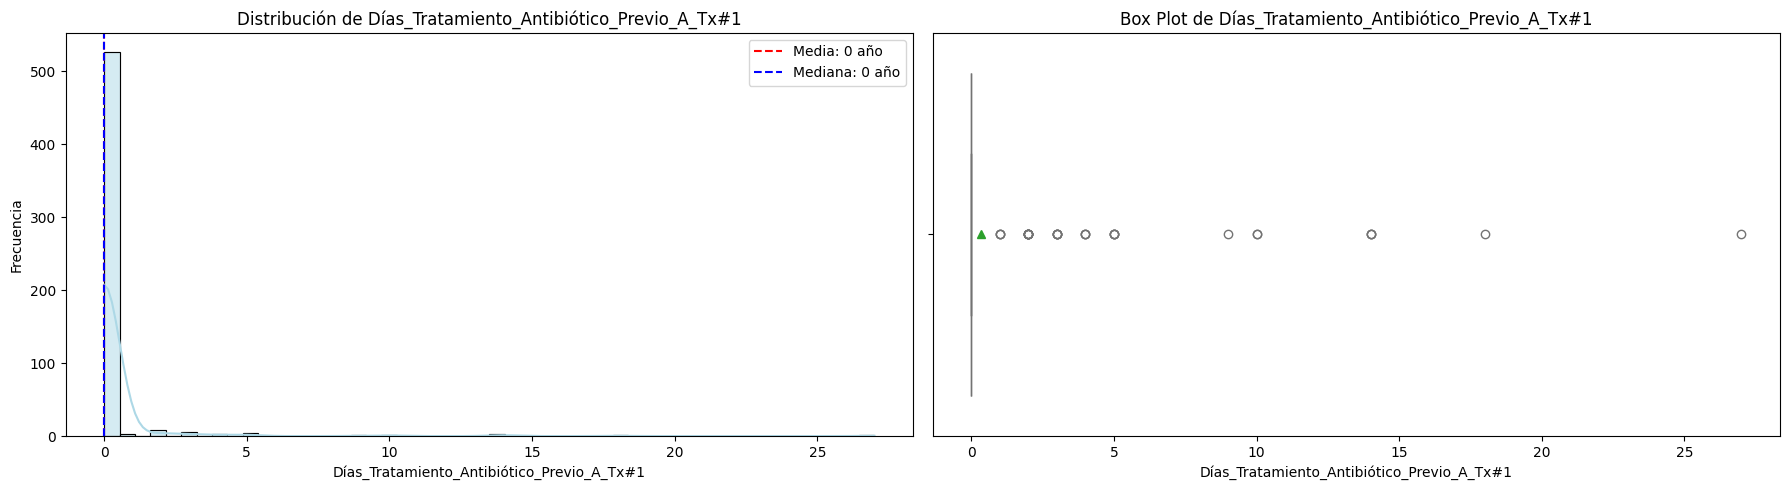

In [76]:
graficar_var_numerica(df, "Días_Tratamiento_Antibiótico_Previo_A_Tx#1", "Días_Tratamiento_Antibiótico_Previo_A_Tx#1")

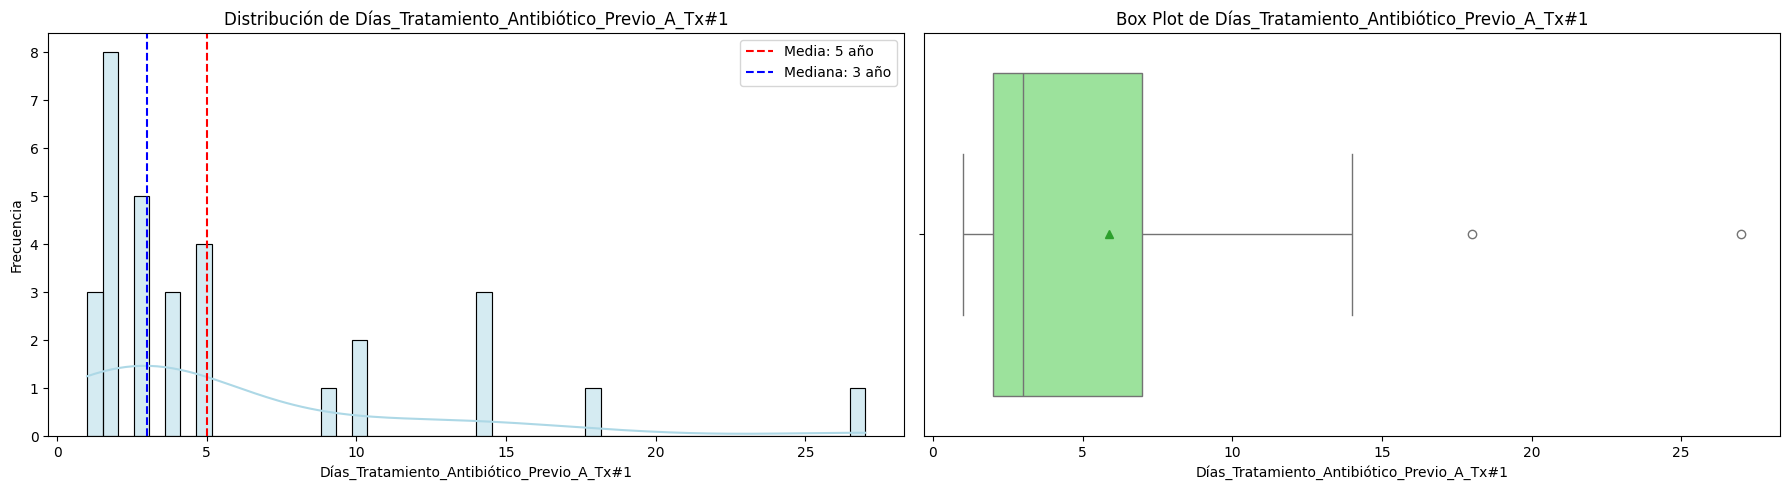

In [77]:
graficar_var_numerica(df[df["Días_Tratamiento_Antibiótico_Previo_A_Tx#1"]!=0], "Días_Tratamiento_Antibiótico_Previo_A_Tx#1", "Días_Tratamiento_Antibiótico_Previo_A_Tx#1")

#### ``Tiempo_De_Dosis_Hasta_Tx#1``	

TIEMPO ENTRE LA PROFILAXIS ANTIBIÓTICA Y LA INCISION (min)de

dejar solo los enteros, borrar decimales y negativos

In [52]:
df["Tiempo_De_Dosis_Hasta_Tx#1"].isna().sum()

np.int64(3)

In [53]:
df["Tiempo_De_Dosis_Hasta_Tx#1"].value_counts(dropna=False)

Tiempo_De_Dosis_Hasta_Tx#1
9999    36
0       16
1       14
10      14
5       13
        ..
68       1
82       1
480*     1
70       1
31       1
Name: count, Length: 206, dtype: int64

In [ ]:
graficar_var_numerica(df, "Tiempo_De_Dosis_Hasta_Tx#1", "TIEMPO ENTRE LA PROFILAXIS ANTIBIÓTICA Y LA INCISION")

## Categoricas

In [94]:

def graficar_var_categorica(df, columna, nombre_columna = None):
    
    nombre_columna = nombre_columna if nombre_columna else columna
    
    pastel = sns.color_palette("pastel")
    # Estadísticas
    columna_stats = df[columna].value_counts()
    columna_pct = df[columna].value_counts(normalize=True) * 100

    # Crear DataFrame auxiliar para graficar
    df_plot = columna_stats.reset_index()
    df_plot.columns = [columna, "count"]
    df_plot["pct"] = columna_pct.values

    # Gráfico con seaborn usando el DataFrame auxiliar
    plt.figure(figsize=(10,6))
    ax = sns.barplot(data=df_plot, x=columna, y="count", palette=pastel, hue = columna)
    ax.set_title(f"Distribución por {nombre_columna}")
    ax.set_xlabel(nombre_columna)
    ax.set_ylabel("Cantidad")

    # Agregar porcentajes sobre cada barra (usando patches es más robusto)
    for patch, pct in zip(ax.patches, df_plot["pct"]):
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        ax.annotate(f"{pct:.1f}%", (x, y), ha='center', va='bottom', fontsize=10, fontweight="bold")

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### ``Tipo_Reconstrucción_Biliar``	

Define cómo se reconstruyó la vía biliar

{'1': 'Ducto - Ducto', '2': 'Hepatico o Coledocoyeyunostomía + Reconstrucción en Y de Roux'}	

In [83]:
df["Tipo_Reconstrucción_Biliar"].isna().sum()

np.int64(1)

In [84]:
df["Tipo_Reconstrucción_Biliar"].value_counts(dropna=False)

Tipo_Reconstrucción_Biliar
1                                                                 482
2                                                                  36
9999-cavo-cavostomia latero lateral                                31
9999                                                                2
NaN                                                                 1
RECONSUTRCCION BILIAR COLEDOCO-COLEDOCOSTOMIA TERMINO-TERMINAL      1
?                                                                   1
no hay nota operatoria                                              1
BILIAR HEPATICO- COLEDOCO STOMIA TERMINO TERMINAL.                  1
0                                                                   1
Name: count, dtype: int64

#### ``Antibiótico_Profiláctico_VS_Terapéutico``	

Define si el AB que recibió al momento de la Cx fue profiláctico como parte de un tratamiento

{'0': 'Profiláctico', '1': 'Terapéutico '}	

In [85]:
df["Antibiótico_Profiláctico_VS_Terapéutico"].isna().sum()

np.int64(0)

In [86]:
df["Antibiótico_Profiláctico_VS_Terapéutico"].value_counts(dropna=False)

Antibiótico_Profiláctico_VS_Terapéutico
0    522
1     35
Name: count, dtype: int64

C:\Users\maril\AppData\Local\Temp\ipykernel_33240\3624369927.py:17: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(data=df_plot, x=columna, y="count", palette=pastel, hue = columna)


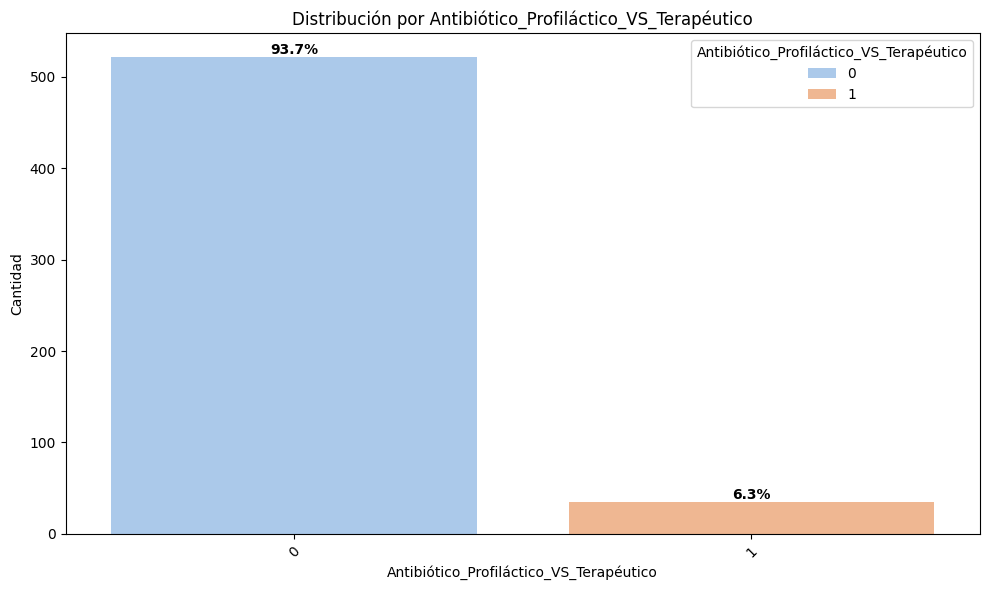

In [95]:
graficar_var_categorica(df, "Antibiótico_Profiláctico_VS_Terapéutico")

#### ``Antibiotico_previo_al_Tx``

Antibiótico terapia previa a 3 meses
	
{'0': 'NO', '1': 'SI'}	


In [89]:
df["Antibiotico_previo_al_Tx"].isna().sum()

np.int64(300)

In [90]:
df["Antibiotico_previo_al_Tx"].value_counts(dropna=False)

Antibiotico_previo_al_Tx
NaN                                                             300
 AMPICILINA-SULBACTAM, GENTAMICINA                               14
 AMPICILINA-SULBACTAM                                            11
 AMPICILINA SULBACTAM - GENTAMICINA                              10
 AMPICILINA SULBACTAM                                            10
                                                               ... 
  CEFTAZIDIME AVIBACTAM + AMIKACINA (ANTIBIOTITOC TERAPEUTIC      1
 PIPERACILINA TZOBACTAM (INICIO 10+47 - FINALIZA 11+30)  COM      1
 PIERACILINA/TAZOBACTAM 4                                         1
  PIPERACILINA TAZOBACTAM (EMPIEZA 07+58 HORAS Y TERMINA 08+      1
  CEFTAZIDIMA AVIBACTAM 2                                         1
Name: count, Length: 198, dtype: int64

#### ``Antibiótico_1__Tx#1``	
MEDICAMENTO ANTIBIÓTICO UTILIZADO COMO PROFILAXIS O TRATAMIENTO
	
{'0': 'NO', '1': 'CEFAZOLINA', '2': 'CEFUROXIMA', '3': 'CEFTRIAXONA', '4': 'CEFEPIME', '5': 'AMPICILINA SULBACTAM ', '6': 'PIPERACILINA TAZOBACTAM ', '7': 'CEFTAZIDIMA AVIBACTAM', '8': 'MEROPENEM ', '9': 'ERTAPENEM ', '10': 'GENTAMICINA', '11': 'AMIKACINA', '12': 'CIPROFLOXACINA', '13': 'CLINDAMICINA', '14': 'VANCOMICINA', '15': 'LINEZOLID', '16': 'TIGECICLINA', '17': 'METRONIDAZOL', '18': 'TRIMETROPIM/SULFAMETOXAZOL'}	


In [96]:
df["Antibiótico_1__Tx#1"].isna().sum()

np.int64(0)

In [97]:
df["Antibiótico_1__Tx#1"].value_counts(dropna=False)

Antibiótico_1__Tx#1
5     392
6      99
8      19
2      15
10      7
7       7
18      6
16      4
9       3
3       2
0       1
12      1
4       1
Name: count, dtype: int64

C:\Users\maril\AppData\Local\Temp\ipykernel_33240\3624369927.py:17: UserWarning: 
The palette list has fewer values (10) than needed (13) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=df_plot, x=columna, y="count", palette=pastel, hue = columna)


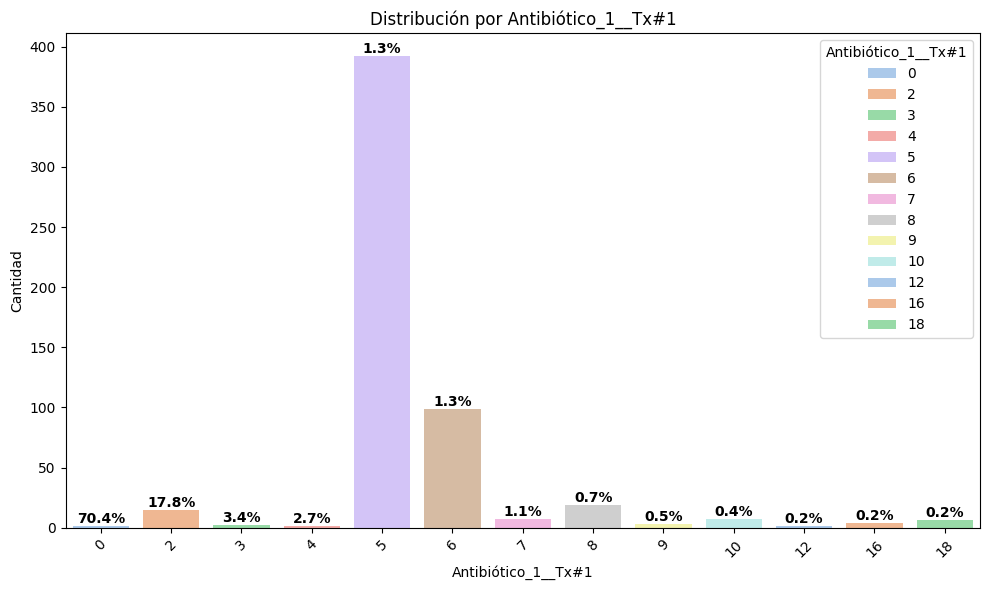

In [98]:
graficar_var_categorica(df, "Antibiótico_1__Tx#1")

#### ``Antibiótico_2_Tx#1	``

MEDICAMENTO ANTIBIÓTICO UTILIZADO COMO PROFILAXIS O TRATAMIENTO	
	
{'0': 'NO', '1': 'CEFAZOLINA', '2': 'CEFUROXIMA', '3': 'CEFTRIAXONA', '4': 'CEFEPIME', '5': 'AMPICILINA SULBACTAM ', '6': 'PIPERACILINA TAZOBACTAM ', '7': 'CEFTAZIDIMA AVIBACTAM', '8': 'MEROPENEM ', '9': 'ERTAPENEM ', '10': 'GENTAMICINA', '11': 'AMIKACINA', '12': 'CIPROFLOXACINA', '13': 'CLINDAMICINA', '14': 'VANCOMICINA', '15': 'LINEZOLID', '16': 'TIGECICLINA', '17': 'METRONIDAZOL', '18': 'TRIMETROPIM/SULFAMETOXAZOL', '19': 'DAPTOMICINA', '20': 'AZTREONAM'}	Categorical

In [100]:
df["Antibiótico_2_Tx#1"].isna().sum()

np.int64(0)

In [101]:
df["Antibiótico_2_Tx#1"].value_counts(dropna=False)

Antibiótico_2_Tx#1
10    361
0     154
17     15
5       8
15      4
14      3
11      2
13      1
3       1
9       1
18      1
12      1
7       1
8       1
16      1
19      1
20      1
Name: count, dtype: int64

In [ ]:
graficar_var_categorica(df, "Antibiótico_1_Tx#2")